Mount gdrive

In [4]:
import os
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Load dataset

In [5]:
basepath = 'drive/My Drive/CSE_575_Road_Condition_Classification_Project/Dataset/'

plain_dir = os.path.join(basepath, 'Training/Plain')
pothole_dir = os.path.join(basepath, 'Training/Pothole')
rocky_dir = os.path.join(basepath, 'Training/Rocky')
bumpy_dir = os.path.join(basepath, 'Training/Bumpy')

print("Total training Plain road images: ", len(os.listdir(plain_dir)))
print("Total training Pothole road images: ", len(os.listdir(pothole_dir)))
print("Total training Pothole road images: ", len(os.listdir(rocky_dir)))
print("Total training Pothole road images: ", len(os.listdir(bumpy_dir)))

plain_files = os.listdir(plain_dir)
print(plain_files[:10])

pothole_files = os.listdir(pothole_dir)
print(pothole_files[:10])


rocky_files = os.listdir(rocky_dir)
print(rocky_files[:10])


bumpy_files = os.listdir(bumpy_dir)
print(bumpy_files[:10])



Total training Plain road images:  300
Total training Pothole road images:  300
Total training Pothole road images:  119
Total training Pothole road images:  43
['160.grusvag-gardesgardar-ola-jennersten-ibl-33-902x492.jpg', '16.nhai-eyes-rs-5000-crore-from-roads-bidding.jpg', '83.slider07_wagdhari_ribbanpalli_20_tollway_plaza.JPG', '344.640px-Approaching-Yamuna01_Agra_Lucknow_Expressway_33198644271-1.jpg', '355.BRO-to-use-plastic-roads.jpeg', '8.d336c256e5e7464f8757216009a9be44.jpg', '155.Heavy_traffic_bad_roads_JF_TT.jpg', '137.380-road-Uttarakhand.jpg', '64.1540148417-3697.jpg', '30.highway-401-westbound-collectors-crash.jpg']
['pothole (476).jpg', 'pothole (52).jpg', 'pothole (2).jpeg', 'pothole (533).jpg', 'pothole (499).jpg', 'pothole (163).jpg', 'pothole (358).jpg', 'pothole (421).jpg', 'pothole (134).jpg', 'pothole (564).jpg']
['000021.jpg', '000016.jpg', '000007.jpg', '000011.jpg', '000059.jpg', '000058.jpg', '000062.jpg', '000051.jpg', '000063.jpg', '000061.jpg']
['download.jp

Sample images

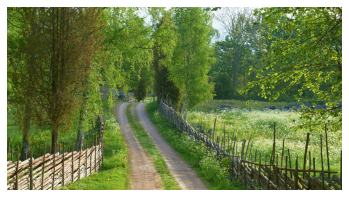

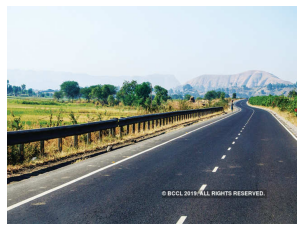

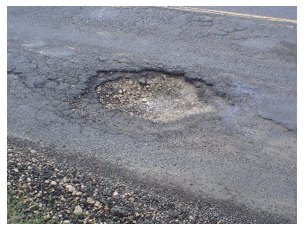

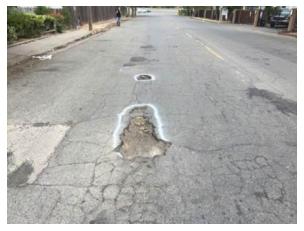

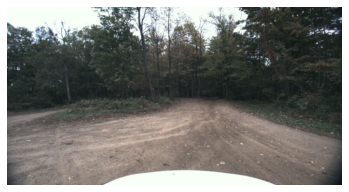

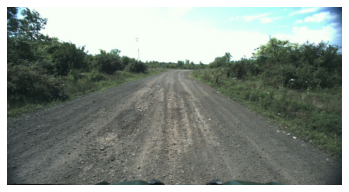

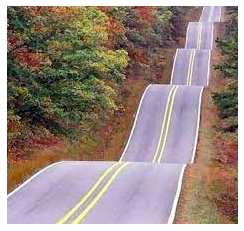

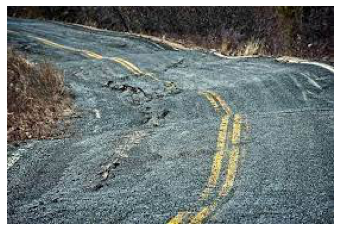

In [6]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

pic_index = 2

plain_images = [os.path.join(plain_dir, fname) for fname in plain_files[pic_index-2:pic_index]]
pothole_images = [os.path.join(pothole_dir, fname) for fname in pothole_files[pic_index-2:pic_index]]
rocky_images = [os.path.join(rocky_dir, fname) for fname in rocky_files[pic_index-2:pic_index]]
bumpy_images = [os.path.join(bumpy_dir, fname) for fname in bumpy_files[pic_index-2:pic_index]]

for i, img_path in enumerate(plain_images+pothole_images+rocky_images+bumpy_images):
  img = mpimg.imread(img_path)
  plt.imshow(img)
  plt.axis('Off')
  plt.show()

Data Augmentation O/P

In [ ]:
# plain_images = [os.path.join(plain_dir, '223.RoadSample2.jpg')]

from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import array_to_img, img_to_array, load_img

datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

img = load_img(os.path.join(plain_dir, '223.RoadSample2.jpg'))  # this is a PIL image
x = img_to_array(img)  # this is a Numpy array with shape (3, 150, 150)
x = x.reshape((1,) + x.shape)  # this is a Numpy array with shape (1, 3, 150, 150)

# the .flow() command below generates batches of randomly transformed images
# and saves the results to the `preview/` directory
i = 0
for batch in datagen.flow(x, batch_size=1,
                          
                          save_to_dir=os.path.join(plain_dir, 'preview'), save_prefix='plain', save_format='jpeg'):
    i += 1
    if i > 20:
        break

FileNotFoundError: ignored

In [ ]:
pic_index = 4
transformed_plain_preview = os.listdir(os.path.join(plain_dir, 'preview'))

transformed_plain_images = [os.path.join(plain_dir, 'preview', fname) for fname in transformed_plain_preview[pic_index-4:pic_index]]

plt.figure(figsize=(300, 300))
fig, axes = plt.subplots(nrows=2, ncols=2)

for imp, ax in zip(transformed_plain_images, axes.ravel()):
    img = mpimg.imread(imp)
    # img.resize((160, 240), Image.ANTIALIAS)
    # print(img.size)
    ax.imshow(img)
    ax.axis('off')
fig.tight_layout()

# for i, img_path in enumerate(transformed_plain_images):
#   img = mpimg.imread(img_path)
#   plt.imshow(img)
#   plt.axis('Off')
#   plt.show()

FileNotFoundError: ignored

Step1: Preprocessing and Data Augmentation model

In [ ]:
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator
import pandas as pd
import numpy as np


train_dir = os.path.join(basepath, 'Training/')
training_datagen = ImageDataGenerator(
      rescale = 1./255,
	    rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

val_dir = os.path.join(basepath, 'Validation/')
validation_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = training_datagen.flow_from_directory(
	train_dir,
	target_size=(150,150),
	class_mode='categorical',
  batch_size=28
)

validation_generator = validation_datagen.flow_from_directory(
	val_dir,
	target_size=(150,150),
	class_mode='categorical',
  batch_size=28
)

model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(4, activation='softmax')
])

model.summary()

opt = tf.keras.optimizers.Adam(
    learning_rate=0.001,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-07,
    amsgrad=False,
    name='Adam'
)

model.compile(loss = 'categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

history = model.fit(train_generator, epochs=25, steps_per_epoch=20, validation_data = validation_generator, verbose = 1, validation_steps=3)

model.save("rdcnn.h5")



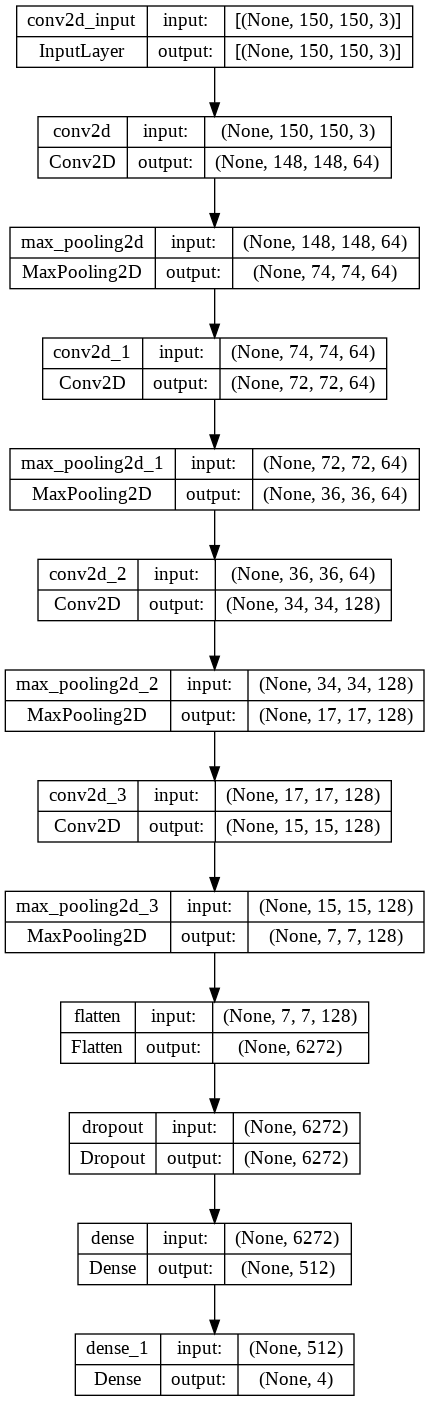

In [ ]:
tf.keras.utils.plot_model(model, to_file=basepath+'/CNN_Model_Plot.png', show_shapes=True)

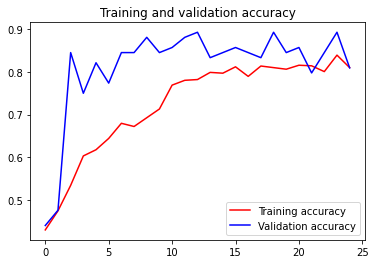

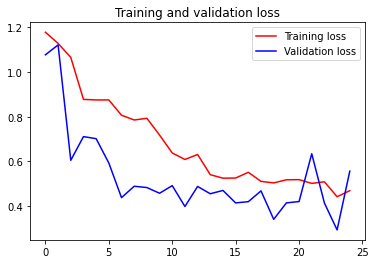

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()

plt.show()

In [ ]:
import numpy as np
from google.colab import files
# from keras.preprocessing import image
from tensorflow.keras.utils import array_to_img, img_to_array, load_img

predict_dir = os.path.join(basepath, 'Predict')

for category in os.listdir(predict_dir):
  print(category, ":")

  pfiles = os.listdir(os.path.join(predict_dir, category))
  for fname in pfiles:
  
    # predicting images
    abs_path = os.path.join(predict_dir, category, fname)
    img = load_img(abs_path, target_size=(150, 150))
    x = img_to_array(img)
    x = np.expand_dims(x, axis=0)

    images = np.vstack([x])
    classes = model.predict(images, batch_size=10)
    print("\t", abs_path)
    print("\t", classes)

In [84]:
y_train2 = []

for i in y_train:
  s=""
  for j in range(4):
    s+=str(int(i[j]))
  y_train2.append(s)
  

 
# y_train2.append()
print(len(y_train2))

1433


In [8]:
# import tensorflow as tf
# import keras_preprocessing
# from keras_preprocessing import image
# from keras_preprocessing.image import ImageDataGenerator
# import pandas as pd
# import numpy as np


# train_dir = os.path.join(basepath, 'Base_data/')
# training_datagen = ImageDataGenerator(
#       rescale = 1./255,
# 	    rotation_range=40,
#       width_shift_range=0.2,
#       height_shift_range=0.2,
#       shear_range=0.2,
#       zoom_range=0.2,
#       horizontal_flip=True,
#       fill_mode='nearest')
# train_generator = training_datagen.flow_from_directory(
# 	train_dir,
# 	target_size=(150,150),
# 	class_mode='categorical',
#   batch_size=28
# )
# X_train, y_train = next(train_generator)

# for i in train_generator:
#   X_train = np.append(X_train, i[0], axis=0 )
#   y_train = np.append(y_train, i[1], axis=0)


# nsamples, nx, ny, nrgb = X_train.shape
# X_train2 = X_train.reshape((nsamples,nx*ny*nrgb))

# print(len(X_train2))
# print(y_train[0])


Found 1337 images belonging to 4 classes.


FileNotFoundError: ignored

In [1]:
print(len(X_train2))
print(y_train[0])

NameError: ignored

In [ ]:
y_train2 = []

for i in y_train:
  s=""
  for j in range(4):
    s+=str(int(i[j]))
  y_train2.append(s)
  


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import f1_score

model = LogisticRegression()
model.fit(X_train2,y_train2)

y_train_pred =model.predict(X_train2)
# Training set performance
rf_train_accuracy = accuracy_score(y_train2, y_train_pred) # Calculate Accuracy
rf_train_mcc = matthews_corrcoef(y_train2, y_train_pred) # Calculate MCC
rf_train_f1 = f1_score(y_train2, y_train_pred, average='weighted') # Calculate F1-score



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Plot accuracy train vs validation data

Evaluate prediction results

In [85]:
from sklearn import svm

rbf = svm.SVC(kernel='rbf', gamma=0.5, C=0.1).fit(X_train2, y_train2)
poly = svm.SVC(kernel='poly', degree=3, C=1).fit(X_train2, y_train2)
poly_pred = poly.predict(X_train2)
rbf_pred = rbf.predict(X_train2)
poly_accuracy = accuracy_score(y_train2, poly_pred)
poly_f1 = f1_score(y_train2, poly_pred, average='weighted')
print('Accuracy (Polynomial Kernel): ', "%.2f" % (poly_accuracy*100))
print('F1 (Polynomial Kernel): ', "%.2f" % (poly_f1*100))

#create a classifier
# cls = svm.SVC(kernel="linear")
# #train the model
# cls.fit(X_train,y_train)
# #predict the response
# pred = cls.predict(X_test)

Accuracy (Polynomial Kernel):  99.44
F1 (Polynomial Kernel):  99.44


In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
# fit the model on the whole dataset
model.fit()

AttributeError: ignored